In [1]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

# For Recommendation System
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix


In [2]:
# Load the dataset
file_path = "data.csv"  # Make sure this file is in the same folder
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Preview the dataset
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# Shape of the dataset
print("Initial Shape:", df.shape)

# Drop rows with missing CustomerID or Description
df.dropna(subset=['CustomerID', 'Description'], inplace=True)

# Remove negative or zero quantities
df = df[df['Quantity'] > 0]

# Remove rows with non-positive UnitPrice
df = df[df['UnitPrice'] > 0]

# Remove duplicate entries
df.drop_duplicates(inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

print("Cleaned Shape:", df.shape)


Initial Shape: (541909, 8)
Cleaned Shape: (392692, 8)


In [4]:
# Add a total price column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


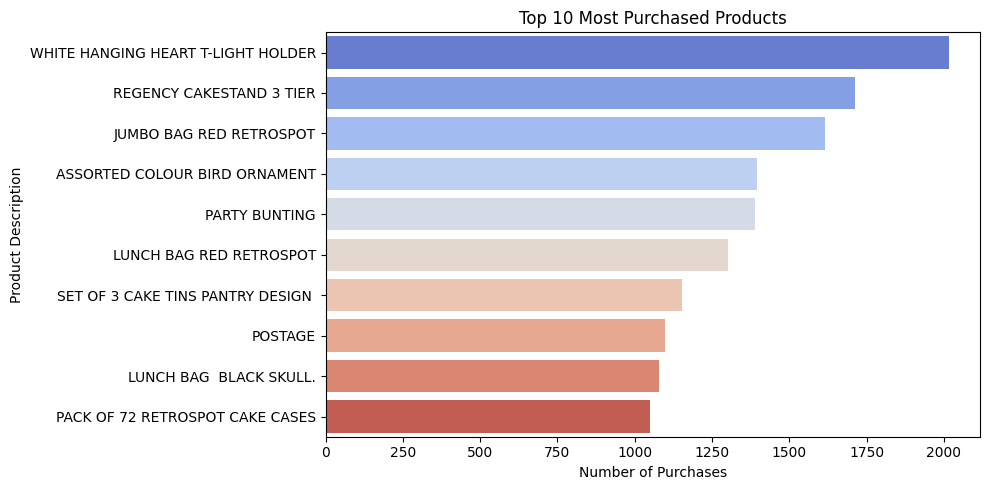

In [6]:
top_products = df['Description'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette='coolwarm')
plt.title("Top 10 Most Purchased Products")
plt.xlabel("Number of Purchases")
plt.ylabel("Product Description")
plt.tight_layout()
plt.show()


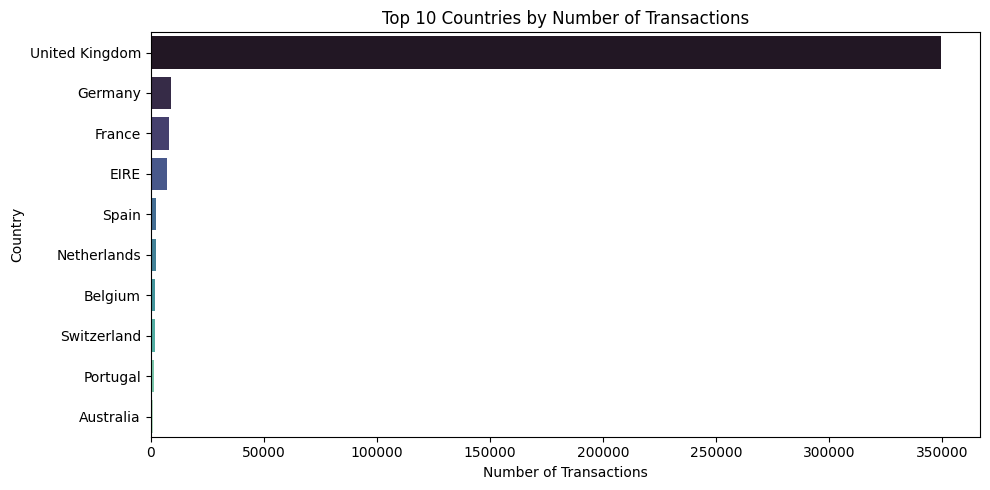

In [7]:
top_countries = df['Country'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='mako')
plt.title("Top 10 Countries by Number of Transactions")
plt.xlabel("Number of Transactions")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


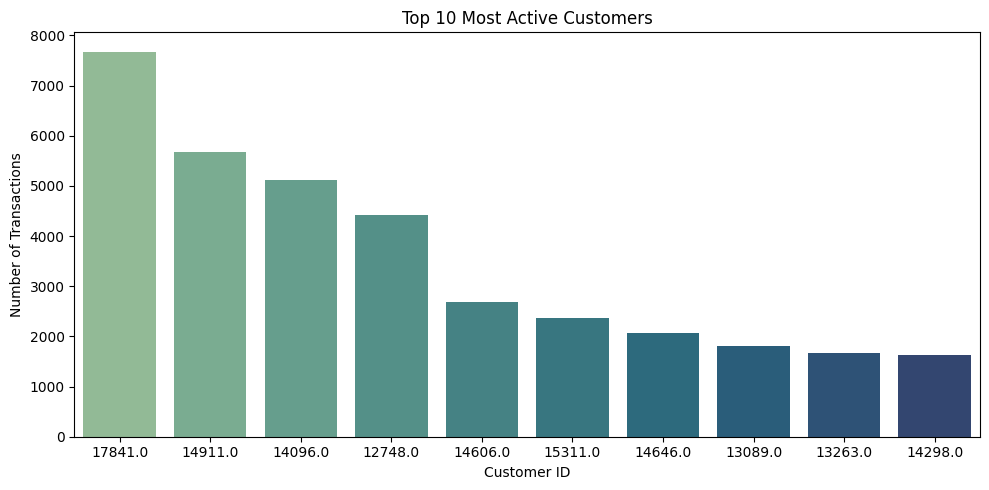

In [8]:
top_customers = df['CustomerID'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette='crest')
plt.title("Top 10 Most Active Customers")
plt.xlabel("Customer ID")
plt.ylabel("Number of Transactions")
plt.tight_layout()
plt.show()


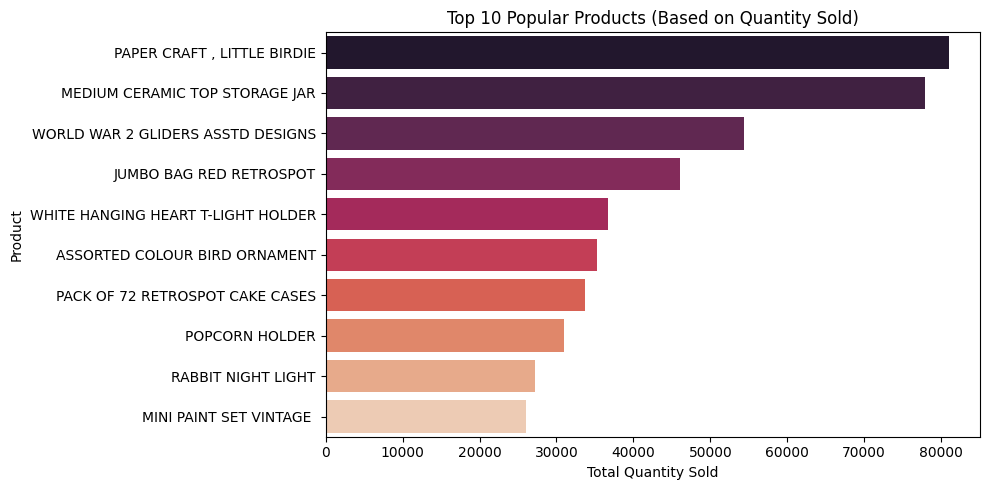

In [10]:
popular_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=popular_products.values, y=popular_products.index, palette='rocket')
plt.title("Top 10 Popular Products (Based on Quantity Sold)")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


In [11]:
def get_top_n_popular_products(n=5):
    top_n = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(n)
    return top_n

print("🔁 Top 5 Product Recommendations:")
print(get_top_n_popular_products(5))


🔁 Top 5 Product Recommendations:
Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
Name: Quantity, dtype: int64


In [12]:
user_item_matrix = df.pivot_table(index='CustomerID', columns='Description', values='Quantity', aggfunc='sum')
user_item_matrix.fillna(0, inplace=True)
user_item_matrix.head()


Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
from sklearn.metrics.pairwise import cosine_similarity

# Transpose for item-item similarity
item_similarity = cosine_similarity(user_item_matrix.T)
item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)

item_similarity_df.head()


Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Description,,,,,,,,,,,,,,,,,,,,,
4 PURPLE FLOCK DINNER CANDLES,1.000000,0.000000,0.000021,0.000228,0.000000,0.000000,0.020228,0.000000,0.000263,0.063543,...,0.0,0.001376,0.015917,0.001771,0.0,0.002852,0.0,0.013155,0.000000,0.002599
50'S CHRISTMAS GIFT BAG LARGE,0.000000,1.000000,0.003534,0.004001,0.000000,0.020230,0.027477,0.902593,0.119038,0.013384,...,0.0,0.001726,0.015572,0.018032,0.0,0.015710,0.0,0.011238,0.000000,0.029793
DOLLY GIRL BEAKER,0.000021,0.003534,1.000000,0.870965,0.980574,0.006358,0.005311,0.003040,0.001764,0.411471,...,0.0,0.000044,0.002869,0.344928,0.0,0.525868,0.0,0.822964,0.000097,0.006665
I LOVE LONDON MINI BACKPACK,0.000228,0.004001,0.870965,1.000000,0.883987,0.020076,0.004912,0.004051,0.008249,0.382226,...,0.0,0.001416,0.004198,0.310053,0.0,0.471772,0.0,0.749303,0.000000,0.010394
I LOVE LONDON MINI RUCKSACK,0.000000,0.000000,0.980574,0.883987,1.000000,0.000000,0.000000,0.000000,0.000000,0.410712,...,0.0,0.000000,0.000000,0.347021,0.0,0.530836,0.0,0.837176,0.000000,0.000000


In [14]:
def get_similar_products(product_name, top_n=5):
    if product_name not in item_similarity_df.columns:
        return f"❌ '{product_name}' not found in product list."
    
    similar_scores = item_similarity_df[product_name].sort_values(ascending=False)[1:top_n+1]
    return similar_scores

# Example usage
get_similar_products("WHITE HANGING HEART T-LIGHT HOLDER")


Description
GIN + TONIC DIET METAL SIGN         0.750192
RED HANGING HEART T-LIGHT HOLDER    0.658714
WASHROOM METAL SIGN                 0.643520
LAUNDRY 15C METAL SIGN              0.642200
GREEN VINTAGE SPOT BEAKER           0.631463
Name: WHITE HANGING HEART T-LIGHT HOLDER, dtype: float64